In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
df = pd.read_csv("data/Ladesaeulenregister_v3.csv", encoding= "iso-8859-15", on_bad_lines='skip', delimiter =";")
df['Coord'] = list(zip(df.Längengrad, df.Breitengrad))
df['Coord'] = df['Coord'].apply(Point)
df['Inbetriebnahmedatum'] = pd.to_datetime(df['Inbetriebnahmedatum'], format='%d.%m.%Y')

In [3]:
df2 = df.set_index('Inbetriebnahmedatum')

In [4]:
shapefile = "Data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

In [5]:
geo_df = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

In [6]:
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [9]:
geo_ger = geo_df.loc[geo_df['country'] == 'Germany']
geo_ger

,country,country_code,geometry
49,Germany,DEU,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48..."


<Axes: >

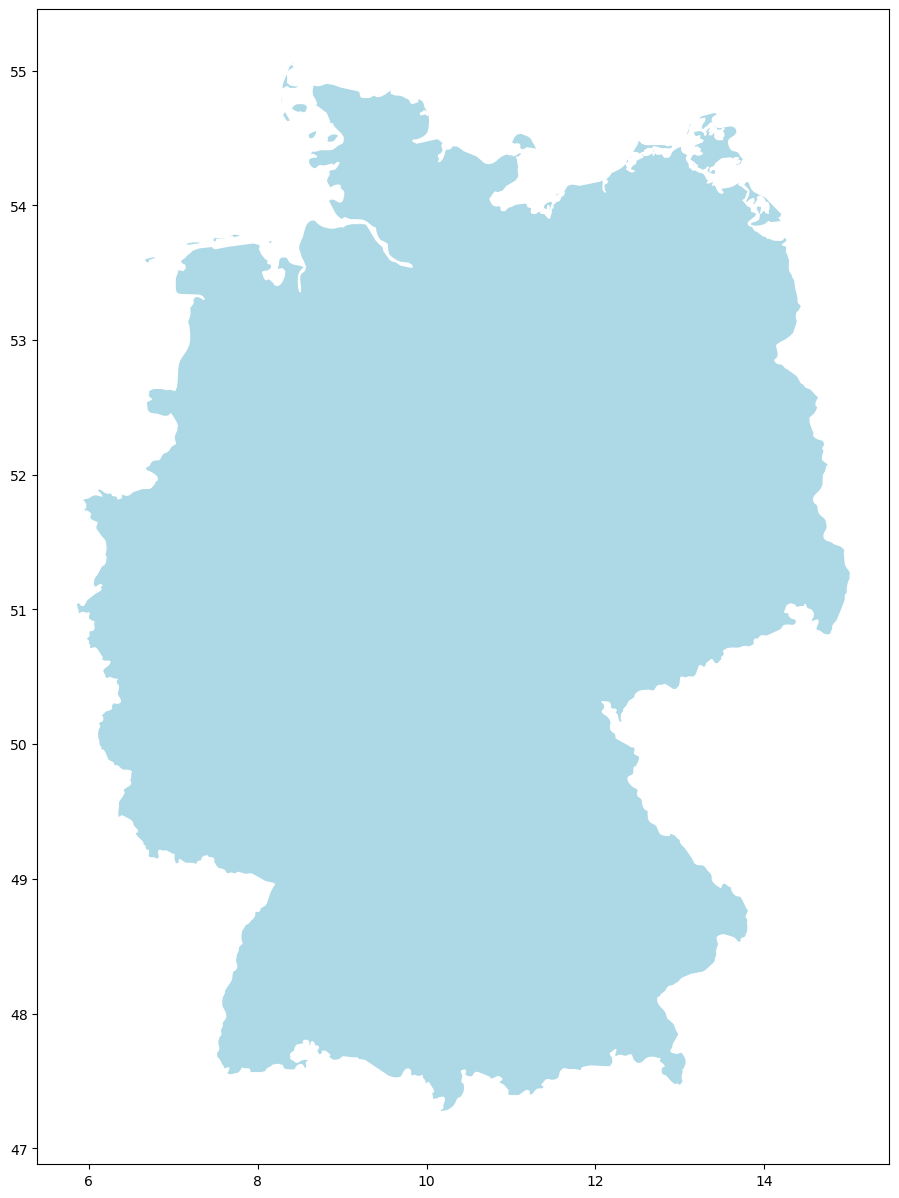

In [10]:
geo_ger.plot(figsize=(15, 15), edgecolor='white', linewidth=1, color='lightblue')

In [11]:
places = "Data/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp"

In [12]:
geo_places = gpd.read_file(places)[['name', 'adm0name', 'worldcity', 'geometry']]

In [13]:
geo_places_ger = geo_places.loc[geo_places['adm0name'] == 'Germany']
ger_places = geo_places_ger.loc[geo_places_ger['worldcity'] == 1]

In [14]:
geo_data = gpd.GeoDataFrame(df2['Coord'], geometry='Coord')
geo_data = geo_data.set_crs('EPSG:4326')

Text(0.5, 0.98, 'Germany Charginginfrastructur till 2023')

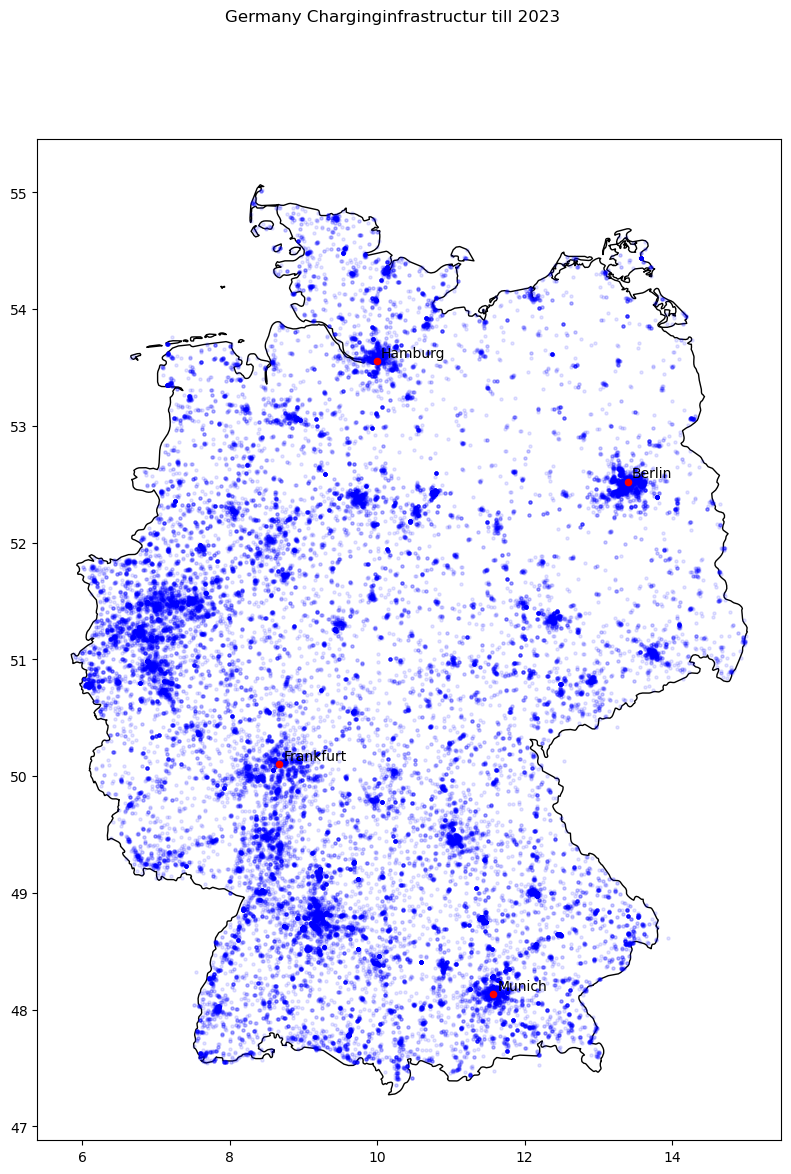

In [15]:
fig, ax = plt.subplots(figsize=(13,13))

geo_ger.plot(ax=ax, facecolor='white', edgecolor='k',alpha=1,linewidth=1)
geo_data.plot(ax=ax, color='blue', markersize=5, alpha=0.1)
ger_places.plot(ax=ax, color='red', markersize=20);
for x,y,label in zip(ger_places.geometry.x, ger_places.geometry.y, ger_places.name):
    ax.annotate(label, xy=(x,y), xytext=(3,3), textcoords="offset points",color = "black")
fig.suptitle('Germany Charginginfrastructur till 2023', fontsize=12)
#plt.savefig('Heatmaps/till_2023.png')

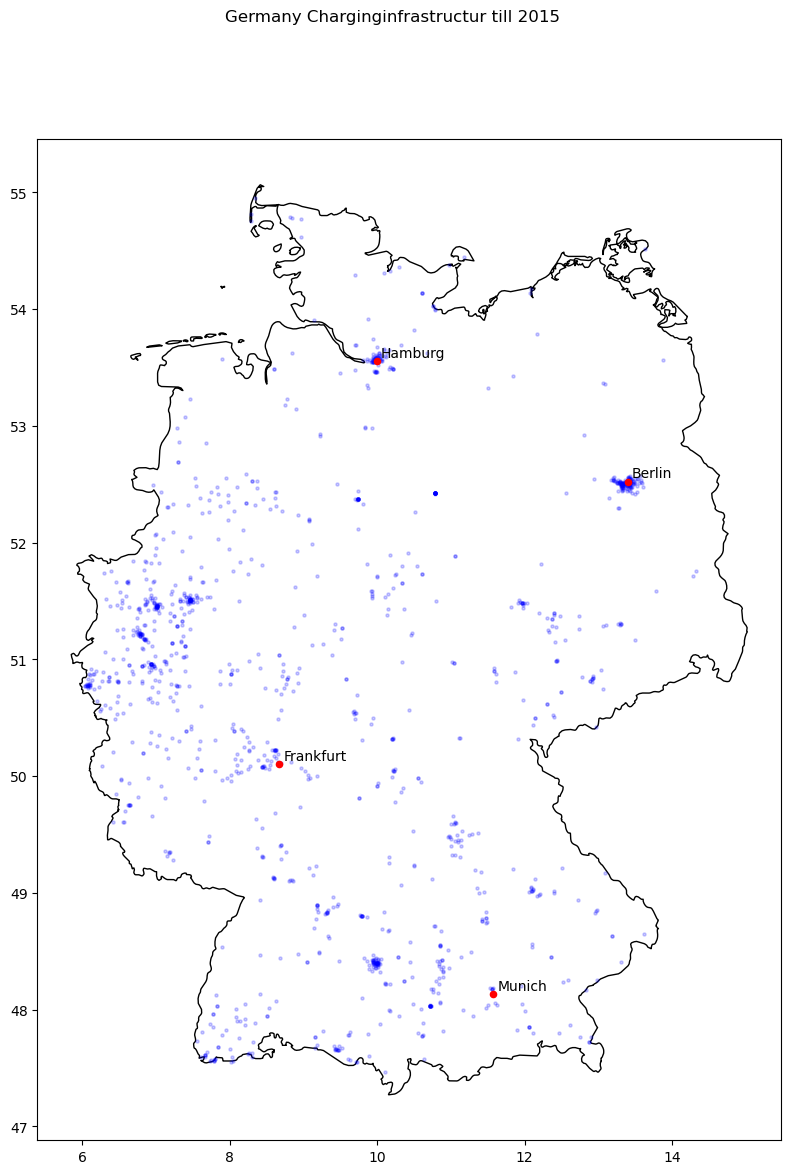

In [144]:
fig, ax = plt.subplots(figsize=(13,13))

geo_ger.plot(ax=ax, facecolor='white', edgecolor='k',alpha=1,linewidth=1)
geo_data.loc[:'2015'].plot(ax=ax, color='blue', markersize=5, alpha=0.2)
ger_places.plot(ax=ax, color='red', markersize=20);
for x,y,label in zip(ger_places.geometry.x, ger_places.geometry.y, ger_places.name):
    ax.annotate(label, xy=(x,y), xytext=(3,3), textcoords="offset points",color = "black")
fig.suptitle('Germany Charginginfrastructur till 2015', fontsize=12)
#plt.savefig('Heatmaps/till_2015.png')

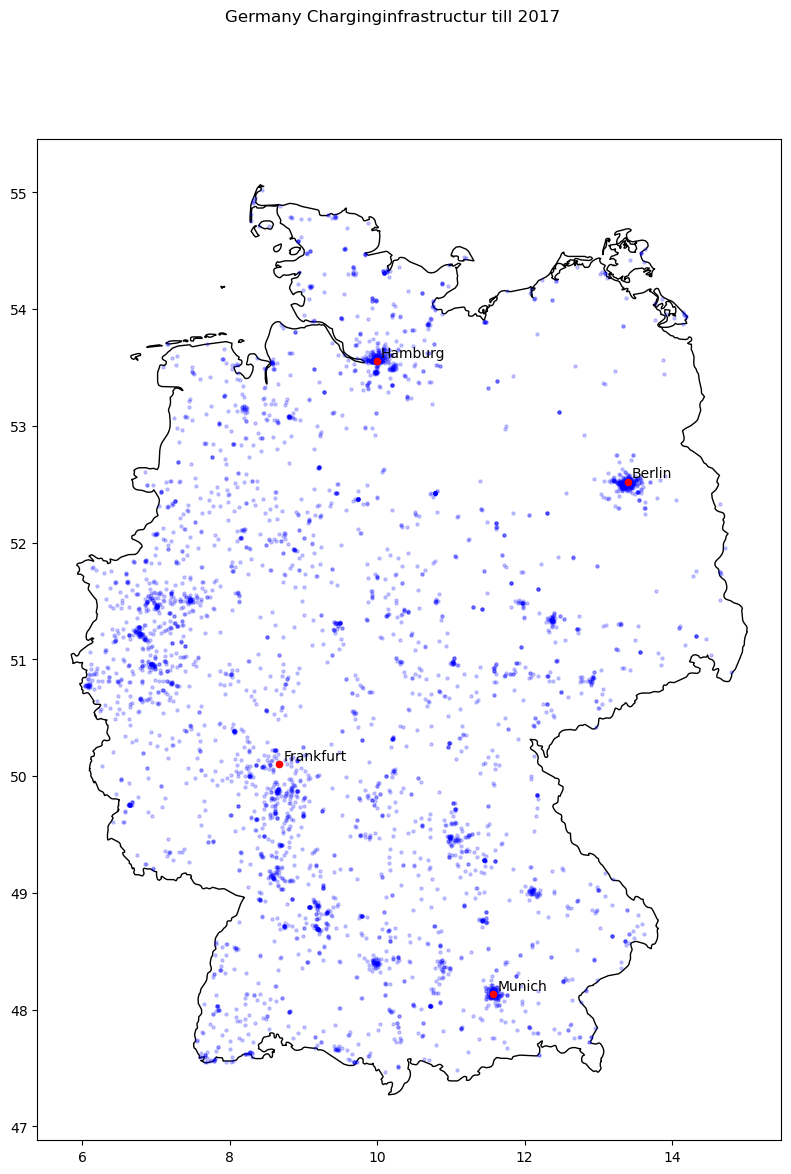

In [145]:
fig, ax = plt.subplots(figsize=(13,13))

geo_ger.plot(ax=ax, facecolor='white', edgecolor='k',alpha=1,linewidth=1)
geo_data.loc[:'2017'].plot(ax=ax, color='blue', markersize=5, alpha=0.2)
ger_places.plot(ax=ax, color='red', markersize=20);
for x,y,label in zip(ger_places.geometry.x, ger_places.geometry.y, ger_places.name):
    ax.annotate(label, xy=(x,y), xytext=(3,3), textcoords="offset points",color = "black")
fig.suptitle('Germany Charginginfrastructur till 2017', fontsize=12)
#plt.savefig('Heatmaps/till_2017.png')

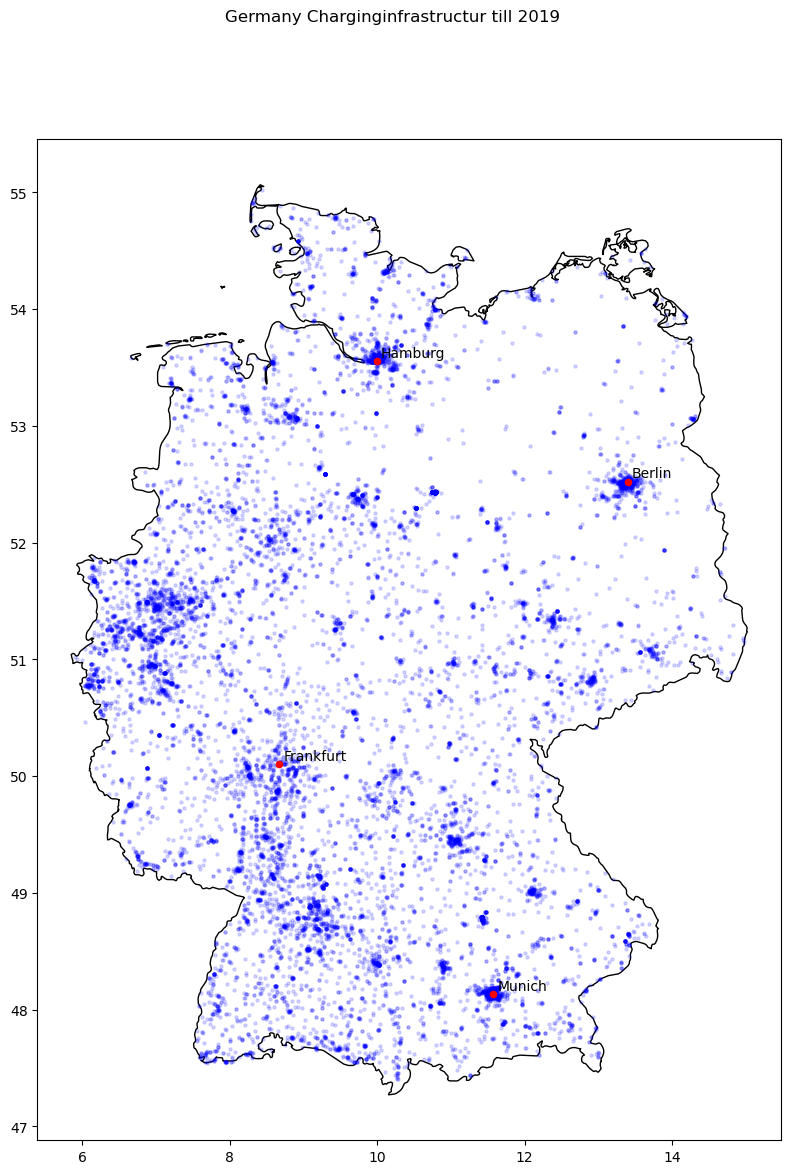

In [146]:
fig, ax = plt.subplots(figsize=(13,13))

geo_ger.plot(ax=ax, facecolor='white', edgecolor='k',alpha=1,linewidth=1)
geo_data.loc[:'2019'].plot(ax=ax, color='blue', markersize=5, alpha=0.15)
ger_places.plot(ax=ax, color='red', markersize=20);
for x,y,label in zip(ger_places.geometry.x, ger_places.geometry.y, ger_places.name):
    ax.annotate(label, xy=(x,y), xytext=(3,3), textcoords="offset points",color = "black")
fig.suptitle('Germany Charginginfrastructur till 2019', fontsize=12)
#plt.savefig('Heatmaps/till_2019.png')

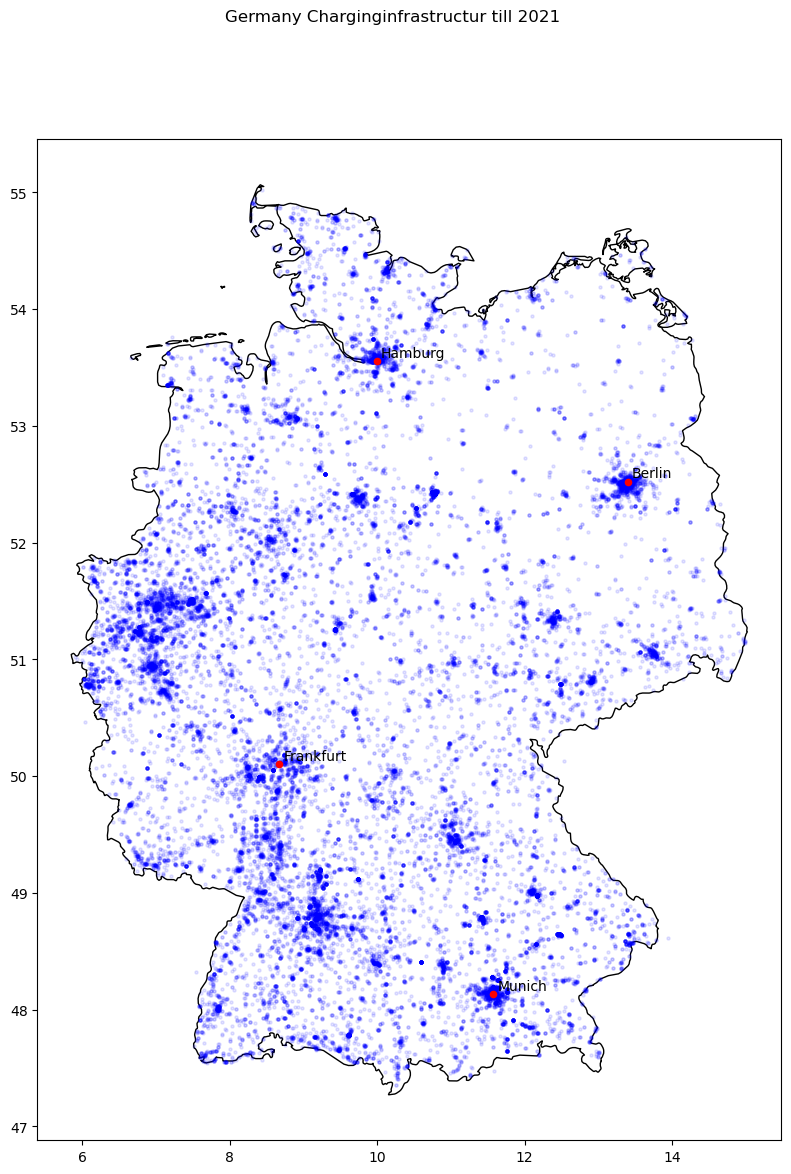

In [147]:
fig, ax = plt.subplots(figsize=(13,13))

geo_ger.plot(ax=ax, facecolor='white', edgecolor='k',alpha=1,linewidth=1)
geo_data.loc[:'2021'].plot(ax=ax, color='blue', markersize=5, alpha=0.1)
ger_places.plot(ax=ax, color='red', markersize=20);
for x,y,label in zip(ger_places.geometry.x, ger_places.geometry.y, ger_places.name):
    ax.annotate(label, xy=(x,y), xytext=(3,3), textcoords="offset points",color = "black")
fig.suptitle('Germany Charginginfrastructur till 2021', fontsize=12)
#plt.savefig('Heatmaps/till_2021.png')

<Axes: xlabel='Inbetriebnahmedatum'>

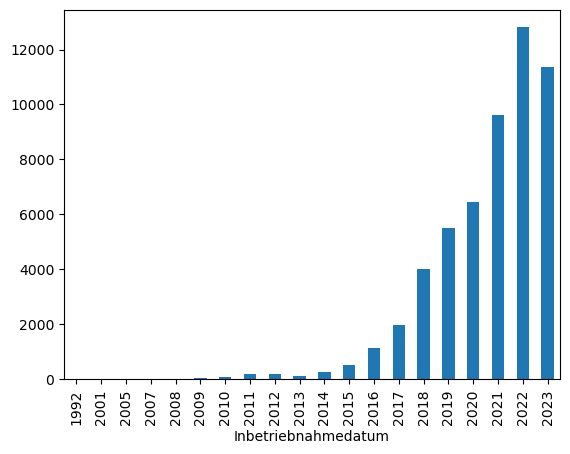

In [17]:
df['Ort'].groupby(df["Inbetriebnahmedatum"].dt.year).count().plot(kind="bar")